# Curse of dimensionality exercises:

## Exercise 2

Suppose we have 50 points between 0 and 100 to be spread randomly. 

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from mpl_toolkits import mplot3d


### First try with one dimension

`1.`Generate and plot the 50 points within 5 intervals:  
- [0,20), 
- [20,40), 
- [40,60), 
- [60,80),
- [80,100)

In [22]:
data = np.random.randint(low=0, high=100, size=50)
y = np.zeros_like(data)
print(data)

[ 8 36 99 36 63 62  8 15 78 68 18 30  8 93 73 92 69 53 75 26 48 12 55  2
 33 99 22 54 63 36 11 36 76 31 80 50 12 31 10 64 90 46 19 69 25 52 31 20
 97 73]


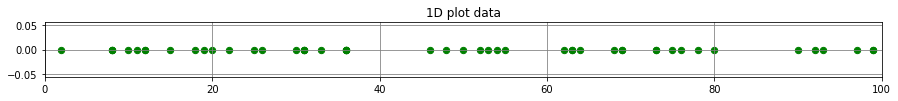

In [23]:
plt.scatter(x=data, y=y, s=40, c="green")
fig = plt.gcf()
fig.set_size_inches(15, 1)
plt.title("1D plot data")
plt.xlim(0, 100)
plt.grid(which='major', color='gray', linestyle='-')
plt.show()

## Now let's try with 2 dimensions

`2.`Assuming we have 5 intervals on the first dimension and 5 intervals on the 2nd dimension, generate 50 points within these intervals and plot them.

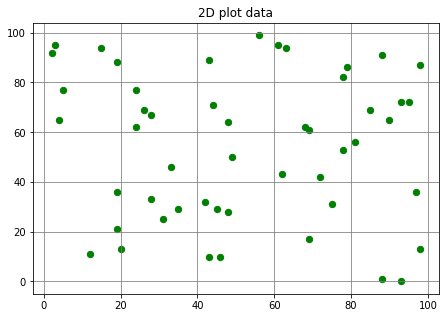

In [24]:
data_2D = np.random.randint(100, size=(50, 2))
plt.scatter(x=data_2D[:, 0], y=data_2D[:, 1], s=40, c="green")
plt.grid(which='major', color='gray', linestyle='-')
plt.tight_layout(w_pad=0, h_pad=0, pad=0, )
plt.title("2D plot data")
plt.show()


## Now in 3D Case

`3.`Now suppose we have 5 intervals on the third dimension.With this condition, generate 50 points within them and plot the points in a 3d manner.

Calculate the average number of points in each cell (both theoretically and practically), then discuss your answers.

Text(0.5, 0.92, '3D plot data')

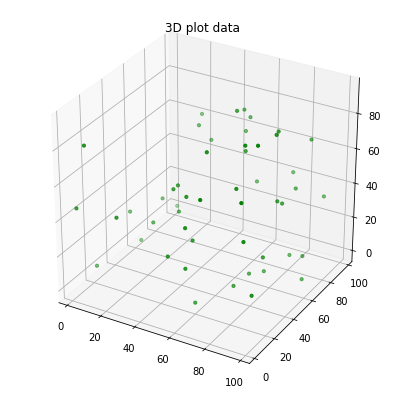

In [25]:
data_3D = np.random.randint(100, size=(50, 3))
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection="3d")
ax.scatter3D(data_3D[:, 0], data_3D[:, 1], data_3D[:, 2], s=10, c="green")
plt.title("3D plot data")


**Answer:**
When dimension increase the empty grid increases exponentially and can not be  representative all the data ,so our model could not learn well. at the top 1d could representative all the data and in each grid we can see lots of data in 2D we can not see lots of data and in 1 grid we have no data and in 3d we have many empy grid so for this solution our data should be increased.



## Exercise 3



`1.`Suppose there is a circle inside a squere. Imagine we've standard scaled our data, so they're centered on zero. This means that the center of our circle is now zero. Try to plot this circle inside a squere. Note that the ratio of your circle is 1.

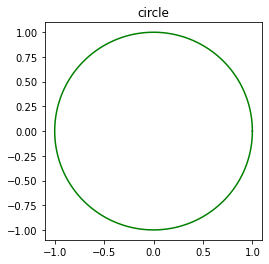

In [26]:
theta = np.linspace(0, 2 * np.pi, 150)

radius = 1

a = radius * np.cos(theta)
b = radius * np.sin(theta)

figure, axes = plt.subplots(1)

axes.plot(a, b, c="green")

axes.set_aspect(1)
plt.title('circle')
plt.show()

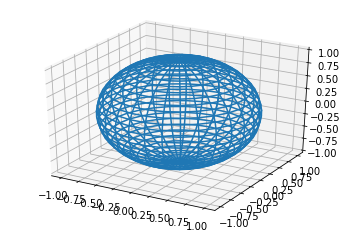

In [27]:
u = np.linspace(0, np.pi, 30)
v = np.linspace(0, 2 * np.pi, 30)
x = np.outer(np.sin(u), np.sin(v))
y = np.outer(np.sin(u), np.cos(v))
z = np.outer(np.cos(u), np.ones_like(v))

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_wireframe(x, y, z)

`2.`Calculate what fraction of the volume of the square is outside the circle.Do the same for the cube outside the sphere, etc (Try to plot the situation and answer the question).

**Bonus :** Try to answer for higher dimensions(4 and more). Draw some random points from a 0-1 distribution, then measure how far away from the origin they are. Also, calculate what percentage of n-cube in inside the n-ball (for n>3). Can you analyze these results?

**Answer:**
answer in document file


### Can we generalize to more than three dimensions? 

Let's draw a bunch of random points from a 0-1 distribution, then measure how far away from the origin they are. (4D to 10D)


In [28]:
def norm(x):
    return np.linalg.norm(x, 2)


def inball(x, R):
    if norm(x) <= R:
        return 1
    return 0


def what_percent_of_the_ncube_is_in_the_nball(samples, R, sample_size=10 ** 4):
    sum = 0
    for sample in samples:
        if inball(sample, R):
            sum += 1
    return sum / sample_size

In [29]:
samples_count = 1000
history = []
dimension = range(4,15)
for d in dimension:
    samples = np.random.uniform(low=0,high=1,size=(samples_count,d))
    percent = what_percent_of_the_ncube_is_in_the_nball(samples,1,samples_count)
    history.append(percent)
    print("what_percent_of_the_ncube_is_in_the_nball for {} dimension is:".format(d),percent)

what_percent_of_the_ncube_is_in_the_nball for 4 dimension is: 0.295
what_percent_of_the_ncube_is_in_the_nball for 5 dimension is: 0.174
what_percent_of_the_ncube_is_in_the_nball for 6 dimension is: 0.085
what_percent_of_the_ncube_is_in_the_nball for 7 dimension is: 0.028
what_percent_of_the_ncube_is_in_the_nball for 8 dimension is: 0.022
what_percent_of_the_ncube_is_in_the_nball for 9 dimension is: 0.008
what_percent_of_the_ncube_is_in_the_nball for 10 dimension is: 0.002
what_percent_of_the_ncube_is_in_the_nball for 11 dimension is: 0.001
what_percent_of_the_ncube_is_in_the_nball for 12 dimension is: 0.0
what_percent_of_the_ncube_is_in_the_nball for 13 dimension is: 0.0
what_percent_of_the_ncube_is_in_the_nball for 14 dimension is: 0.0


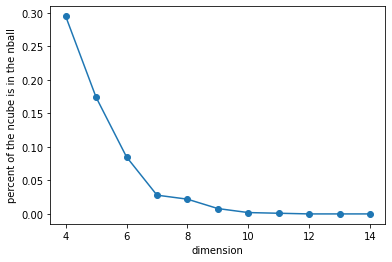

In [30]:
plt.scatter(dimension,history)
plt.plot(dimension,history)
plt.xlabel("dimension")
plt.ylabel("percent of the ncube is in the nball")
plt.show()

## Exercise 4

`1.`Generate 50 points randomly with a uniform distribution in the range of 0 to 100 for one, three, ten and one hundred dimensions, then calculate the average distance of 5 nearest neighbors (5-NN) for 10 random points in each dimension.
Discuss your answer.

In [31]:
from sklearn.neighbors import NearestNeighbors

dimensions = [1,3,10,100]

for dimension in dimensions:
    distribution = np.random.uniform(low=0,high=100,size=(50,dimension))
    KNN_l2 = NearestNeighbors(n_neighbors = 5, metric='minkowski', p= 2).fit(distribution)
    KNN_l1 = NearestNeighbors(n_neighbors = 5, metric='minkowski', p= 1).fit(distribution)
    KNN_cos = NearestNeighbors(n_neighbors = 5, metric='cosine', p= 2).fit(distribution)
    random_data = random.choices(distribution,k=10)
    count=0
    for data in random_data:
      distances = KNN_l2.kneighbors()[0]
      print()
      count = count+1
      print("mean of point{} in {} dimension in minkowski l2 metric is:".format(count,dimension),distances[count].mean())

    count=0
    for data in random_data:
      distances = KNN_l1.kneighbors()[0]
      print()
      count = count+1
      print("mean of point{} in {} dimension in minkowski l1 metric is:".format(count,dimension),distances[count].mean())

    count=0
    for data in random_data:
      distances = KNN_cos.kneighbors()[0]
      print()
      count = count+1
      print("mean of point{} in {} dimension in cosine l2 metric is:".format(count,dimension),distances[count].mean())
    









mean of point1 in 1 dimension in minkowski l2 metric is: 2.7818990838351922

mean of point2 in 1 dimension in minkowski l2 metric is: 2.834726360092978

mean of point3 in 1 dimension in minkowski l2 metric is: 4.4584970666859975

mean of point4 in 1 dimension in minkowski l2 metric is: 8.844723782725492

mean of point5 in 1 dimension in minkowski l2 metric is: 2.093644318963544

mean of point6 in 1 dimension in minkowski l2 metric is: 3.055290879144386

mean of point7 in 1 dimension in minkowski l2 metric is: 2.3969015996738903

mean of point8 in 1 dimension in minkowski l2 metric is: 2.0799051442155077

mean of point9 in 1 dimension in minkowski l2 metric is: 2.0519969940791043

mean of point10 in 1 dimension in minkowski l2 metric is: 3.0060384869448797

mean of point1 in 1 dimension in minkowski l1 metric is: 2.7818990838351922

mean of point2 in 1 dimension in minkowski l1 metric is: 2.834726360092978

mean of point3 in 1 dimension in minkowski l1 metric is: 4.4584970666859975

me